<a href="https://colab.research.google.com/github/rbiamru/MentalHealthvsInflation/blob/main/MentalHealth%26Inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [2]:
#Installing Kaggle -> datasets, notebooks, community; https://www.kaggle.com/
#the datasets can be dowloaded in .csv format

!pip install kaggle

#link to the dataset https://www.kaggle.com/datasets/sazidthe1/global-inflation-data
#to refer to dataset you need to copy username/dataset_name from the URL
!kaggle datasets download -d sazidthe1/global-inflation-data

#unzips the dataset
!unzip global-inflation-data.zip
#deletes the initial zip file to save the space
!rm global-inflation-data.zip

Dataset URL: https://www.kaggle.com/datasets/sazidthe1/global-inflation-data
License(s): other
  0% 0.00/14.4k [00:00<?, ?B/s]
100% 14.4k/14.4k [00:00<00:00, 25.2MB/s]
Archive:  global-inflation-data.zip
  inflating: global_inflation_data.csv  


In [3]:
#now, please try to install second data set from the link below:

#https://www.kaggle.com/datasets/programmerrdai/mental-health-dataset

!kaggle datasets download -d programmerrdai/mental-health-dataset

#unzips the dataset
!unzip mental-health-dataset.zip
#deletes the initial zip file to save the space
!rm mental-health-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/programmerrdai/mental-health-dataset
License(s): CC0-1.0
  0% 0.00/1.59M [00:00<?, ?B/s]
100% 1.59M/1.59M [00:00<00:00, 37.7MB/s]
Archive:  mental-health-dataset.zip
  inflating: mental-and-substance-use-as-share-of-disease.csv  
  inflating: prevalence-by-mental-and-substance-use-disorder.csv  
  inflating: prevalence-of-depression-males-vs-females.csv  
  inflating: share-with-depression.csv  
  inflating: share-with-mental-and-substance-disorders.csv  
  inflating: share-with-mental-or-substance-disorders-by-sex.csv  


# Data Cleaning, part 1

In [4]:
import pandas as pd

# Load datasets
inflation_data = pd.read_csv('global_inflation_data.csv')
mental_health_data = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')

# Preview datasets
print(inflation_data.head())
# print(mental_health_data.head())


  country_name                                   indicator_name  1980  1981  \
0  Afghanistan  Annual average inflation (consumer prices) rate  13.4  22.2   
1      Albania  Annual average inflation (consumer prices) rate   NaN   NaN   
2      Algeria  Annual average inflation (consumer prices) rate   9.7  14.6   
3      Andorra  Annual average inflation (consumer prices) rate   NaN   NaN   
4       Angola  Annual average inflation (consumer prices) rate  46.7   1.4   

   1982  1983  1984  1985  1986  1987  ...  2015   2016   2017   2018  2019  \
0  18.2  15.9  20.4   8.7  -2.1  18.4  ... -0.66   4.38   4.98   0.63   2.3   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.90   1.30   2.00   2.00   1.4   
2   6.6   7.8   6.3  10.4  14.0   5.9  ...  4.80   6.40   5.60   4.30   2.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  ... -1.10  -0.40   2.60   1.00   0.5   
4   1.8   1.8   1.8   1.8   1.8   1.8  ...  9.20  30.70  29.80  19.60  17.1   

    2020   2021   2022  2023  2024  
0   5.44   5.

In [9]:
import pandas as pd

# Load datasets
inflation_data = pd.read_csv('global_inflation_data.csv')
mental_health_data = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')

# Rename columns for consistency
# Make sure 'Country Name' is the actual column name in inflation_data
# inflation_data.rename(columns={'country_name': 'Country'}, inplace=True)
# Correct the column name to 'year'
inflation_data.rename(columns={'year': 'Year'}, inplace=True)
mental_health_data.rename(columns={'Entity': 'Country'}, inplace=True)

# --- Extract year from column names in inflation_data ---
# 1. Get the year columns (all columns except 'country_name')
year_cols = inflation_data.columns[2:]  # Assuming 'country_name' is the first column

# 2. Extract the year from each column name
years = [int(col) for col in year_cols]

# 3. Reshape the inflation data using melt
inflation_data = pd.melt(inflation_data, id_vars=['country_name'], value_vars=year_cols,
                         var_name='Year', value_name='Inflation Rate')

# 4. Rename 'country_name' to 'Country' for consistency
inflation_data.rename(columns={'country_name': 'Country'}, inplace=True)

# --- Now you have a 'Year' column in inflation_data ---

# Convert 'Year' to integer in both DataFrames
inflation_data['Year'] = inflation_data['Year'].astype(int)
mental_health_data['Year'] = pd.to_numeric(mental_health_data['Year'], errors='coerce').astype('Int64')


# Merge the DataFrames on 'Country' and 'Year'
merged_data = pd.merge(inflation_data, mental_health_data, on=['Country', 'Year'], how='inner')

# Display the first few rows of the merged DataFrame
print(merged_data.head())

# To find outlier data for inflation rate > 50 like Brazil in 1990 etc.
outliers = merged_data[merged_data['Inflation Rate'] > 50]
print(outliers)

# Creating a new dataframe
filtered_data = merged_data[merged_data['Inflation Rate'] <= 50]
print(filtered_data.head())

       Country  Year  Inflation Rate Code  \
0  Afghanistan  1990            47.4  AFG   
1      Albania  1990            -0.2  ALB   
2      Algeria  1990             9.3  DZA   
3      Andorra  1990             NaN  AND   
4       Angola  1990             1.8  AGO   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           4.340942                                                
2                                           4.346285                                                
3                                           9.629760                                                
4                                           1.303001                                                
                 Country  Year  Inflation Rate Code  \
22                Brazil  1990          2947.7  BRA   
26           

In [6]:
# Example: Drop rows with missing values
# merged_data.dropna(inplace=True)

filtered_data.dropna(inplace=True)


In [11]:
# from sklearn.linear_model import LinearRegression
# X = merged_data[['Inflation Rate']]
# y = merged_data['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']
# model = LinearRegression().fit(X, y)
# print(f"Coefficient: {model.coef_[0]}")

from sklearn.linear_model import LinearRegression
X = filtered_data[['Inflation Rate']]
y = filtered_data['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']
model = LinearRegression().fit(X, y)
print(f"Coefficient: {model.coef_[0]}")

Coefficient: -0.07311938870105596


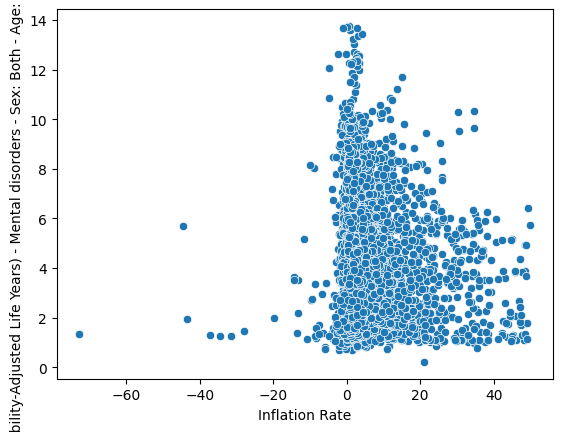

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Use the correct column name 'Inflation Rate' for x
# sns.scatterplot(x='Inflation Rate', y='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)', data=merged_data)
# plt.show()
sns.scatterplot(x='Inflation Rate', y='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)', data=filtered_data)
plt.show()